In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**download the flower data from keras database**

In [ ]:
url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
dir=keras.utils.get_file(fname='flower_photos',origin=url,untar=True,cache_dir='.')

In [ ]:
dir

'./datasets/flower_photos'

In [ ]:
import os 
import cv2
import PIL
import pathlib

In [ ]:
data_dir=pathlib.Path(dir)

In [ ]:
str(data_dir)

'datasets/flower_photos'

In [ ]:
data_dir

PosixPath('datasets/flower_photos')

**here we previwe the folder and show the images**

---





In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
daisy=list(data_dir.glob('daisy/*'))
daisy[:5]

[PosixPath('datasets/flower_photos/daisy/2509545845_99e79cb8a2_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4581199679_867652c3f1_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6148728633_27afc47b0c_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/1656856503_447e5b0f03.jpg'),
 PosixPath('datasets/flower_photos/daisy/4668543441_79040ca329_n.jpg')]

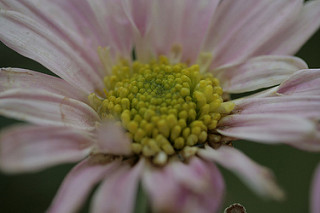

In [ ]:
PIL.Image.open(str(daisy[0]))

**this dictenary is use to get name of all flower from the folder**

In [ ]:
#this dictenary is use to get name of all flower from the folder
flower_img_dic={
    'daisy' : list(data_dir.glob('daisy/*')),
    'dendelion' : list(data_dir.glob('dandelion/*')),
    'roses' : list(data_dir.glob('roses/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [ ]:
flower_img_dic['roses']

[PosixPath('datasets/flower_photos/roses/5570018782_c56bee942f.jpg'),
 PosixPath('datasets/flower_photos/roses/12240303_80d87f77a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2949945463_366bc63079_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3909587261_f8cd3e7fe7.jpg'),
 PosixPath('datasets/flower_photos/roses/534228982_4afbcece9b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/459042023_6273adc312_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17449165090_dfb27af360_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9216323421_f737c1d50e.jpg'),
 PosixPath('datasets/flower_photos/roses/4093390305_4010c736c9.jpg'),
 PosixPath('datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5398569540_7d134c42cb_n.jpg'),
 P

**naming the flower in number**

In [ ]:
flower_name={
    'daisy':0,
    'dendelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
flower_name['roses']

2

**encoding the images**

In [ ]:
img=cv2.imread(str(flower_img_dic['roses'][0]))

In [ ]:
img

array([[[ 73,   9, 222],
        [ 64,  10, 207],
        [ 80,  30, 224],
        ...,
        [ 14,   0, 175],
        [ 28,   6, 172],
        [ 31,   0, 191]],

       [[ 83,  38, 225],
        [ 67,  14, 225],
        [ 64,   4, 228],
        ...,
        [ 27,   7, 190],
        [ 27,   0, 174],
        [ 33,   0, 194]],

       [[ 74,  39, 227],
        [ 74,  23, 234],
        [120,  86, 227],
        ...,
        [ 45,  25, 198],
        [ 32,   0, 168],
        [ 41,   4, 190]],

       ...,

       [[ 74,  33, 224],
        [ 73,  42, 217],
        [ 69,  51, 204],
        ...,
        [ 59,  51, 218],
        [ 69,  63, 234],
        [ 66,  62, 227]],

       [[ 68,  42, 202],
        [ 56,  35, 192],
        [ 61,  49, 201],
        ...,
        [  6,   0, 161],
        [ 14,  10, 175],
        [ 45,  42, 205]],

       [[120,  81, 227],
        [ 93,  56, 212],
        [ 53,  25, 198],
        ...,
        [ 88,  59, 216],
        [ 67,  39, 198],
        [ 32,   4, 171]]

In [ ]:
img.shape

(251, 500, 3)

**here we set the name of flower in number form and resize the shape of images**

In [ ]:
x=[]
y=[]
for flower_n,images in flower_img_dic.items():
  for image in images:
    img=cv2.imread(str(image))
    resize_img=cv2.resize(img,(180,180))
    x.append(resize_img)
    y.append(flower_name[flower_n])


In [ ]:
x[3600]

array([[[ 31,  34,  43],
        [ 36,  42,  54],
        [ 28,  38,  52],
        ...,
        [ 48,  66,  99],
        [ 41,  62,  96],
        [ 35,  42,  58]],

       [[ 16,  26,  35],
        [ 27,  41,  55],
        [ 25,  44,  60],
        ...,
        [ 44,  79, 118],
        [ 35,  74, 114],
        [ 30,  53,  74]],

       [[  7,  22,  31],
        [ 19,  39,  54],
        [ 14,  39,  59],
        ...,
        [ 36,  73, 121],
        [ 38,  73, 120],
        [ 33,  52,  79]],

       ...,

       [[ 29,  40,  92],
        [ 27,  64, 144],
        [ 39,  71, 155],
        ...,
        [103, 164, 207],
        [107, 173, 210],
        [ 94, 124, 158]],

       [[ 23,  38,  89],
        [ 20,  60, 137],
        [ 34,  64, 145],
        ...,
        [109, 164, 204],
        [113, 174, 208],
        [ 95, 126, 157]],

       [[ 35,  36,  66],
        [ 29,  55, 109],
        [ 43,  55, 113],
        ...,
        [102, 146, 182],
        [ 98, 157, 185],
        [ 78, 113, 137]]

In [ ]:
y[0:5]

[0, 0, 0, 0, 0]

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
y.shape

(3670,)

In [ ]:
x.shape

(3670, 180, 180, 3)

**spliting the dataset into test and train**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [ ]:
len(x_train)

2569

In [ ]:
len(x_test)

1101

In [ ]:
len(y_train)

2569

**scaling the image for better score**

In [ ]:
x_train_scale=x_train/255
x_test_scale=x_test/255

In [ ]:
x_train_scale.shape

(2569, 180, 180, 3)

**compile and train the model**

In [ ]:
number_flower=5
model=keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(number_flower,activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)
model.fit(x_train_scale,y_train,epochs=30)

Epoch 1/30
81/81 [==============================] - 13s 26ms/step - loss: 1.3766 - accuracy: 0.4013
Epoch 2/30
81/81 [==============================] - 2s 24ms/step - loss: 1.1048 - accuracy: 0.5302
Epoch 3/30
81/81 [==============================] - 2s 24ms/step - loss: 0.9564 - accuracy: 0.6127
Epoch 4/30
81/81 [==============================] - 2s 24ms/step - loss: 0.8103 - accuracy: 0.6905
Epoch 5/30
81/81 [==============================] - 2s 24ms/step - loss: 0.6196 - accuracy: 0.7731
Epoch 6/30
81/81 [==============================] - 2s 25ms/step - loss: 0.4596 - accuracy: 0.8307
Epoch 7/30
81/81 [==============================] - 2s 25ms/step - loss: 0.2773 - accuracy: 0.9042
Epoch 8/30
81/81 [==============================] - 2s 25ms/step - loss: 0.1612 - accuracy: 0.9548
Epoch 9/30
81/81 [==============================] - 2s 25ms/step - loss: 0.1191 - accuracy: 0.9638
Epoch 10/30
81/81 [==============================] - 2s 26ms/step - loss: 0.1118 - accuracy: 0.9622
Epoch 11

**score of model**

In [ ]:
model.evaluate(x_test_scale,y_test)

35/35 [==============================] - 1s 18ms/step - loss: 3.0636 - accuracy: 0.6167


[3.063647985458374, 0.6167120933532715]

In [ ]:
prediction=model.predict(x_test_scale)

In [ ]:
prediction[0]

array([5.98380923e-01, 9.99968171e-01, 1.10104024e-01, 9.99976397e-01,
       6.90026378e-13], dtype=float32)

In [ ]:
np.argmax(prediction[0])

3

In [ ]:
y_test[0]

1

In [ ]:
y_test[3]

4

In [ ]:
np.argmax(prediction[3])

0

In [ ]:
np.argmax(prediction[1000])

4

In [ ]:
y_test[1000]

4

**we creat some changes in images and creat some extra image for better result**

In [ ]:
data_augumentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

**again train the model**

In [ ]:
model2=keras.Sequential([
    data_augumentation,
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    
    keras.layers.Dense(1200,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(number_flower,activation='sigmoid')
])

In [ ]:
model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)
model2.fit(x_train_scale,y_train,epochs=40)

Epoch 1/40
81/81 [==============================] - 4s 36ms/step - loss: 0.5029 - accuracy: 0.8182
Epoch 2/40
81/81 [==============================] - 3s 36ms/step - loss: 0.5137 - accuracy: 0.8085
Epoch 3/40
81/81 [==============================] - 3s 35ms/step - loss: 0.4942 - accuracy: 0.8233
Epoch 4/40
81/81 [==============================] - 3s 35ms/step - loss: 0.4674 - accuracy: 0.8221
Epoch 5/40
81/81 [==============================] - 3s 35ms/step - loss: 0.4672 - accuracy: 0.8346
Epoch 6/40
81/81 [==============================] - 3s 35ms/step - loss: 0.4495 - accuracy: 0.8388
Epoch 7/40
81/81 [==============================] - 3s 35ms/step - loss: 0.4771 - accuracy: 0.8392
Epoch 8/40
81/81 [==============================] - 3s 39ms/step - loss: 0.4531 - accuracy: 0.8381
Epoch 9/40
81/81 [==============================] - 3s 35ms/step - loss: 0.4111 - accuracy: 0.8525
Epoch 10/40
81/81 [==============================] - 3s 35ms/step - loss: 0.3979 - accuracy: 0.8626
Epoch 11/

**here score is much better than first model**

In [ ]:
model2.evaluate(x_test_scale,y_test)

35/35 [==============================] - 1s 16ms/step - loss: 1.0847 - accuracy: 0.7048


[1.0846887826919556, 0.7048137784004211]